### Бинарный поиск

In [3]:
# O(log n)
# Базовый бинарный поиск, если нет элемента возвращает None
# Список должени быть отсортирован !
def bs(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2

        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return None


# tests
print(bs([1, 3, 5, 7, 9, 12, 15, 24, 35, 46, 57, 89, 90], 15))
print(bs([1, 3, 5, 6, 7, 9, 0], 2))
print(bs([1, 2, 3, 6], 1))
print(bs([1, 3, 4, 6, 7], 7))
print(bs([1, 2, 3], 3))
print(bs([2, 5], 2))
print(bs([1], 1))
print(bs([1], 2))
print(bs([], 3))

n = 2**31
seq = range(1, n+1)
print(bs(seq, n))

6
None
0
4
2
0
0
None
None
2147483647


In [ ]:
# левый бинарный поиск
def lbs(arr, args):
    l = 0
    r = len(arr) - 1

    while l < r:
        mid = (l + r) // 2
        res = ...
        if res:
            r = mid
        else:
            l = mid + 1
    
    return l

In [ ]:
# правый бинарный поиск
def lbs(arr, args):
    l = 0
    r = len(arr) - 1

    while l < r:
        mid = (l + r + 1) // 2
        res = ...
        if res:
            l = mid
        else:
            r = mid - 1

    return l

In [74]:
# Базовый бинарный поиск, если нет элемента возвращает индекс где должен находиться элемент
def bs_i(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2

        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return left


# tests
print(bs_i([1, 3, 5, 7, 9, 12, 15, 24, 35, 46, 57, 89, 90], 16))

In [43]:
'''
    Поиск индекса где переворачивается список, обе части отсортированны.
    For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].
'''
def find_pivot(seq):
    left = 0
    right = len(seq) - 1

    while (left < right):
        mid = (left + right)//2
        if seq[mid] > seq[right]:
            left = mid + 1
        else:
            right = mid
    return left

# tests 
print(find_pivot([4, 5, 6, 7, 0, 1, 2]))          # 4
print(find_pivot([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])) # 2
print(find_pivot([0, 1, 2, 3, 4, 5, 6, 7]))       # 0
print(find_pivot([4, 5, 6, 7, 8, 9, 3]))          # 6
print(find_pivot([4, 5, 6, 7, 8, 9]))             # 0
print(find_pivot([1]))                            # 0
print(find_pivot([]))                             # 0
print(find_pivot([3, 1]))                         # 1
print(find_pivot([5, 1, 3]))                      # 1

4
2
0
6
0
0
0
1
1


In [76]:
'''
    Есть массив, состоящий из некоторого количества подряд идущих нулей, за которыми следует какое-то количество подряд идущих единиц:
    a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1].
    Найти индекс первой единицы, то есть найти такое место, где заканчиваются нули, и начинаются единицы.
'''
def one_search(arr):
    left = -1
    right = len(arr)

    while right - left > 1:
        mid = (left + right) // 2

        if arr[mid] == 0:
            left = mid
        else:
            right = mid
    
    return left, right

# tests
print(one_search([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))
print(one_search([0, 1]))
print(one_search([0, 0, 0, 1]))
print(one_search([0, 1, 1, 1]))

(8, 9)
(0, 1)
(2, 3)
(0, 1)


In [7]:
'''
    Найти первое (левое) число, равное X в отсортированном массиве, или вывести, что таких чисел нет
'''
def left_index_search(arr, target):
    left = 0
    right = len(arr)
    flag = None

    while left < right:
        mid = (left + right) // 2

        if arr[mid] < target:
            left = mid + 1
        else:
            if arr[mid] == target: 
                flag = mid
            right = mid
    return flag

# tests
print(left_index_search([1, 2, 2, 3], 2))
print(left_index_search([2, 2, 2], 2))
print(left_index_search([2], 2))
print(left_index_search([1], 2))
print(left_index_search([], 2))
print(left_index_search([2, 2, 3, 4], 2))
print(left_index_search([0, 1, 2, 2], 2))
print(left_index_search([1, 3, 3, 4], 2))
print(left_index_search([1, 3, 3, 4], 0))
print(left_index_search([1, 3, 3, 4], 5))

1
0
0
None
None
0
2
None
None
None


In [9]:
'''
    Найти последнее (правое) число, равное X в отсортированном массиве, или вывести, что таких чисел нет
'''
def right_index_search(arr, target):
    left = 0
    right = len(arr)
    flag = None

    while left < right:
        mid = (left + right) // 2

        if arr[mid] > target:
            right = mid
        else:
            if arr[mid] == target: 
                flag = mid
            left = mid + 1
    return flag

# tests
print(right_index_search([1, 2, 2, 3], 2))
print(right_index_search([2, 2, 2], 2))
print(right_index_search([2], 2))
print(right_index_search([1], 2))
print(right_index_search([], 2))
print(right_index_search([2, 2, 3, 4], 2))
print(right_index_search([0, 1, 2, 2], 2))
print(right_index_search([1, 3, 3, 4], 2))
print(right_index_search([1, 3, 3, 4], 0))
print(right_index_search([1, 3, 3, 4], 5))

2
2
0
None
None
1
3
None
None
None


In [78]:
'''
    Дан массив чисел, первая часть состоит из нечетных чисел, а вторая - из четных. Найти индекс, начиная с которого все числа четные.
'''
def even_search(arr):
    left = 0
    right = len(arr) - 1

    while left != right:
        mid = (left + right) // 2

        if arr[mid] % 2 == 0:
            right = mid
        else:
            left = mid + 1
    
    return left


# tests
print(even_search([1, 3, 5, 2, 4, 6]))
print(even_search([2, 4, 6]))
print(even_search([1, 3, 5, 7, 4]))

3
0
4


In [10]:
''' 
    Поиск в матрице
'''
def sm(matrix, target):
        ln = len(matrix) * len(matrix[0])
        l = 0
        r = ln

        while l < r:
            mid = (l + r) // 2
            i = mid // len(matrix[0])
            j = mid % len(matrix[0])
            if matrix[i][j] == target:
                return True
            elif matrix[i][j] < target:
                l = mid + 1
            else:
                r = mid
        return False

# tests
print(sm([[1,3,5,7],[10,11,16,20],[23,30,34,60]], 3))
print(sm([[1,3,5,7],[10,11,16,20],[23,30,34,60]], 13))
print(sm([[1]], 1))

True
False
True


In [79]:
'''
    Find the pivot integer X such that:
    The sum of all elements between 1 and X inclusively equals the sum of all elements between X and N inclusively.
    Return the pivot integer X. If no such integer exists, return -1.

    : simple solution !
        n = arr[-1]
        sums = n * (n + 1) // 2
        a = math.sqrt(sums)
        if a == math.ceil(a):
            return int(a)
        else:
            return -1
'''
def pivot_search(arr):
    left = -1
    right = len(arr) - 1
    A = arr[right]
    S = A + ((A * A - A) // 2)

    while left < right:
        mid = (left + right) // 2
        
        a = arr[mid]
        S1 = ((a * a - a) // 2)
        S2 = S - S1 - a
        if S1 == S2:
            return a
        elif S1 < S2:
            left = mid + 1
        else:
            right = mid

    return None

# tests
print(pivot_search([1, 2, 3, 4, 5, 6, 7, 8]))  # 6
print(pivot_search([1]))  # 1
print(pivot_search([1, 2, 3, 4])) # None

6
1
None


In [80]:
'''
    Поиск квадратного корня числа n с показателем корня r_exp
'''
def sqrt_search(n, r_exp=2):
    if (n == 0 or n == 1):
            return n
    left = 1
    right = n
    for _ in range(100):
        mid = (left + right) / 2      # теперь деление не нацело !
        if mid ** r_exp > n:
            right = mid
        else:
            left = mid
    return left, right

# tests
print(sqrt_search(9))
print(sqrt_search(2))
print(sqrt_search(8, 3))

(3.0, 3.0000000000000004)
(1.414213562373095, 1.4142135623730951)
(2.0, 2.0000000000000004)


In [96]:
'''
    Есть N прямоугольных листов бумаги («дипломов») одинакового размера w x h. Можно купить квадратную 
    доску размера L x L, повесить её на стену так, чтобы одна сторона была горизонтальной, а другая 
    вертикальной, и на эту доску повесить эти дипломы так, чтобы они не перекрывались. При этом дипломы
    тоже надо повесить не поворачивая: сторона w должна быть горизонтальной, а сторона h — вертикальной.
    Какой минимальный размер доски L требуется, чтобы повесить все дипломы?
'''
def board_search(n, w, h):
    left = 0
    right = w*n + h*n

    while right - left > 1:
        mid = (left + right) // 2

        if (mid // w) * (mid // h) >= n:
            right = mid
        else:
            left = mid
    return right

# tests
print(board_search(2, 16, 30))

32


In [6]:
''' 
    Find peak element
    A peak element is an element that is strictly greater than its neighbors.
    Given a 0-indexed integer array nums, find a peak element, and return its index.
    If the array contains multiple peaks, return the index to any of the peaks.
    You may imagine that nums[-1] = nums[n] = -∞. In other words, an element is always 
    considered to be strictly greater than a neighbor that is outside the array.
    1 <= nums.length <= 1000
'''
def findPeak(nums):
        l = 0
        r = len(nums) - 1
        while l < r:
            mid = (l + r) // 2
            if nums[mid] > nums[mid+1]:
                r = mid
            else:
                l = mid + 1
        return l

# tests
print(findPeak([1, 2, 3, 1]))
print(findPeak([1, 2, 1, 3, 5, 6, 4]))
print(findPeak([1, 2]))
print(findPeak([1]))

2
5
1
0


### Тернарный поиск  
Метод поиска минимума или максимума функции на отрезке, которая либо сначала строго возрастает, затем строго убывает, либо наоборот.  
  
Делим отрезок на три равные части:  
- middle_left = (2 * left + right) / 3  
- middle_right = (left + 2 * right) / 3  

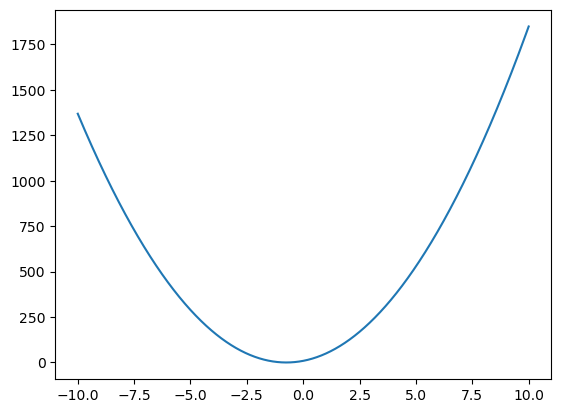

-0.7500102427596917


In [34]:
def func(x):
    return (4*x+3)**2


def ter_search(left, right):
    eps = 0.0001
    while right - left > eps:
        a = (left * 2 + right) / 3
        b = (left + right * 2) / 3

        fa = func(a)
        fb = func(b)
        if fa < fb:
            right = b
        else:
            left = a
    return (left + right) / 2

# tests
import random
import matplotlib.pyplot as plt
nums = sorted([round(random.uniform(-10.0, 10.0), 4) for _ in range(10000)])
plt.plot(nums, [func(e) for e in nums])
plt.show()
print(ter_search(nums[0], nums[-1]))